### Etri - data EDA

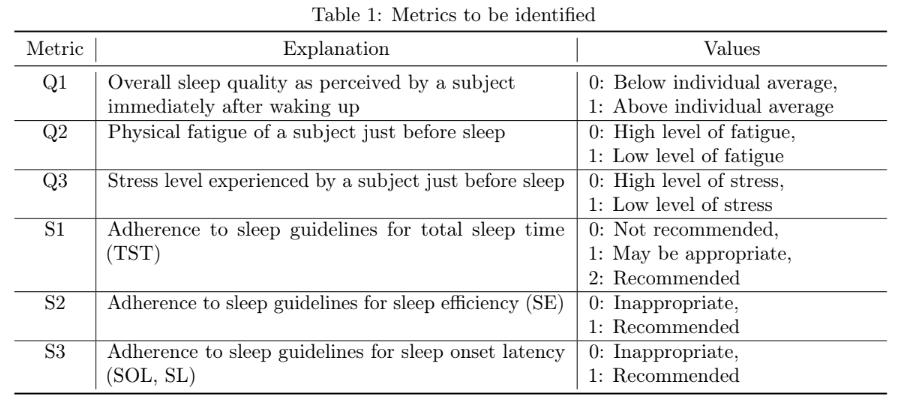

In [68]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [69]:
wHr = pd.read_parquet('ch2025_data_items/ch2025_wHr.parquet')
wPedo = pd.read_parquet('ch2025_data_items/ch2025_wPedo.parquet')
mGps = pd.read_parquet('ch2025_data_items/ch2025_mGps.parquet')
mLight = pd.read_parquet('ch2025_data_items/ch2025_mLight.parquet')
wLight = pd.read_parquet('ch2025_data_items/ch2025_wLight.parquet')
mAmbience = pd.read_parquet('ch2025_data_items/ch2025_mAmbience.parquet')

### wHR
- "Heart rate readings recorded by the smartwatch."
- 심박수 : 1분단위 고정 / 리스트(초 단위인데 결측치 있음)

In [6]:
wHr

,subject_id,timestamp,heart_rate
0,id01,2024-06-26 12:23:00,"[134, 134, 135, 133, 134, 135, 134, 135, 134, ..."
1,id01,2024-06-26 12:24:00,"[123, 122, 121, 120, 121, 121, 120, 118, 119, ..."
2,id01,2024-06-26 12:25:00,"[120, 119, 117, 116, 119, 121, 123, 123, 121, ..."
3,id01,2024-06-26 12:26:00,"[125, 124, 124, 124, 125, 124, 124, 123, 123, ..."
4,id01,2024-06-26 12:27:00,"[116, 116, 117, 118, 116, 116, 116, 117, 115, ..."
...,...,...,...
382913,id10,2024-09-26 18:50:00,"[78, 78, 78, 78, 78, 78, 77, 78, 78, 79, 79, 8..."
382914,id10,2024-09-26 18:51:00,"[84, 84, 84, 85, 85, 85, 85, 84, 84, 85, 84, 8..."
382915,id10,2024-09-26 18:52:00,"[86, 86, 87, 87, 87, 87, 86, 86, 85, 85, 84, 8..."
382916,id10,2024-09-26 18:53:00,"[85, 85, 85, 86, 86, 86, 84, 84, 83, 82, 82, 8..."


In [7]:
print('분당 수집된 심박수 데이터 수')
for i in range(0,10):
    print(len(wHr['heart_rate'][i])) 

분당 수집된 심박수 데이터 수
39
60
60
54
46
57
56
50
47
60


### wPedo
- "Step data recorded by the smartwatch."
- step_frequency : metadata상 분당 걸음수라고 기제되어있지만, 초당걸음수로 해석하는게 올바를 듯 함
- running_step / walking_step : 전부 0값만 관측됨
- distance / speed : 단위는 분/초
- burned_calories : step과 distance, 각각에 대한 corr 모두 낮게 나옴(0.25)

In [8]:
wPedo

,subject_id,timestamp,step,step_frequency,running_step,walking_step,distance,speed,burned_calories
0,id01,2024-06-26 12:09:00,10,0.166667,0,0,8.33,0.138833,0.0
1,id01,2024-06-26 12:10:00,0,0.000000,0,0,0.00,0.000000,0.0
2,id01,2024-06-26 12:11:00,0,0.000000,0,0,0.00,0.000000,0.0
3,id01,2024-06-26 12:12:00,0,0.000000,0,0,0.00,0.000000,0.0
4,id01,2024-06-26 12:13:00,0,0.000000,0,0,0.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
748095,id10,2024-09-26 23:55:00,0,0.000000,0,0,0.00,0.000000,0.0
748096,id10,2024-09-26 23:56:00,0,0.000000,0,0,0.00,0.000000,0.0
748097,id10,2024-09-26 23:57:00,0,0.000000,0,0,0.00,0.000000,0.0
748098,id10,2024-09-26 23:58:00,0,0.000000,0,0,0.00,0.000000,0.0


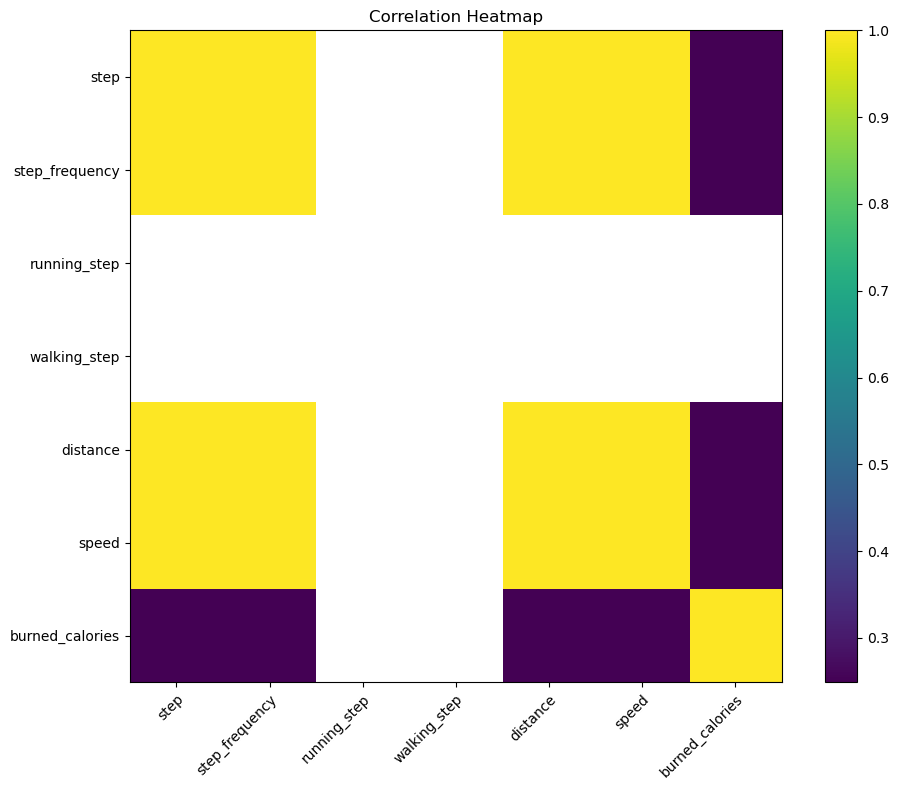

In [27]:
corr = wPedo.iloc[:, 2:].corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.imshow(corr, interpolation='nearest')

fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### mGps
- "Multiple GPS coordinates measured within a single minute using the smartphone."
- m_gps : 1행에 대하여 11~12개의 딕셔너리가 리스트형태로 묶여있음

In [66]:
mGps['m_gps'].iloc[0]

array([{'altitude': 110.6, 'latitude': 0.2077385, 'longitude': 0.170027, 'speed': 0.0},
       {'altitude': 110.8, 'latitude': 0.2077759, 'longitude': 0.1699851, 'speed': 0.721},
       {'altitude': 110.8, 'latitude': 0.2077728, 'longitude': 0.1699834, 'speed': 0.0505},
       {'altitude': 110.7, 'latitude': 0.20779, 'longitude': 0.1699686, 'speed': 0.6587},
       {'altitude': 110.7, 'latitude': 0.2077914, 'longitude': 0.1699708, 'speed': 0.0568},
       {'altitude': 110.8, 'latitude': 0.2077972, 'longitude': 0.1699657, 'speed': 0.1768},
       {'altitude': 110.8, 'latitude': 0.2078002, 'longitude': 0.1699627, 'speed': 0.0907},
       {'altitude': 110.8, 'latitude': 0.2077985, 'longitude': 0.1699631, 'speed': 0.0337},
       {'altitude': 110.8, 'latitude': 0.207801, 'longitude': 0.1699642, 'speed': 0.0411},
       {'altitude': 110.8, 'latitude': 0.207802, 'longitude': 0.1699639, 'speed': 0.0296},
       {'altitude': 110.8, 'latitude': 0.2078011, 'longitude': 0.169963, 'speed': 0.0194}

In [ ]:
# altitude : 직접적인 연관성
# latitude, longtitude : 평소 생활하던 곳과 멀리 떨어져 있는 경우
# speed : 이동 정지 및 유지기간 확인 후 위의 speed과 비교
mGps['m_gps'].iloc[0]

array([{'altitude': 110.6, 'latitude': 0.2077385, 'longitude': 0.170027, 'speed': 0.0},
       {'altitude': 110.8, 'latitude': 0.2077759, 'longitude': 0.1699851, 'speed': 0.721},
       {'altitude': 110.8, 'latitude': 0.2077728, 'longitude': 0.1699834, 'speed': 0.0505},
       {'altitude': 110.7, 'latitude': 0.20779, 'longitude': 0.1699686, 'speed': 0.6587},
       {'altitude': 110.7, 'latitude': 0.2077914, 'longitude': 0.1699708, 'speed': 0.0568},
       {'altitude': 110.8, 'latitude': 0.2077972, 'longitude': 0.1699657, 'speed': 0.1768},
       {'altitude': 110.8, 'latitude': 0.2078002, 'longitude': 0.1699627, 'speed': 0.0907},
       {'altitude': 110.8, 'latitude': 0.2077985, 'longitude': 0.1699631, 'speed': 0.0337},
       {'altitude': 110.8, 'latitude': 0.207801, 'longitude': 0.1699642, 'speed': 0.0411},
       {'altitude': 110.8, 'latitude': 0.207802, 'longitude': 0.1699639, 'speed': 0.0296},
       {'altitude': 110.8, 'latitude': 0.2078011, 'longitude': 0.169963, 'speed': 0.0194}

### mLight
- "Ambient light measured by the smartphone."

In [ ]:
# 조명 존재여부 - 실외, 실내(야간, 주간)
# 자는시간대 빛에 노출되어있는지 -> 시간대를 분류
mLight

,subject_id,timestamp,m_light
0,id01,2024-06-26 12:03:00,534.000000
1,id01,2024-06-26 12:13:00,846.000000
2,id01,2024-06-26 12:23:00,826.000000
3,id01,2024-06-26 12:33:00,851.000000
4,id01,2024-06-26 12:43:00,428.000000
...,...,...,...
96253,id10,2024-09-26 23:17:00,30.982502
96254,id10,2024-09-26 23:27:00,52.987503
96255,id10,2024-09-26 23:37:00,52.987503
96256,id10,2024-09-26 23:47:00,52.987503


In [77]:
mLight['m_light'].describe()

count     96258.000000
mean        185.176751
std        1939.970572
min           0.000000
25%           0.000000
50%           9.000000
75%         157.000000
max      334306.000000
Name: m_light, dtype: float64

### wLight
- "Ambient light measured by the smartwatch."

In [ ]:
# cross validation
wLight 

,subject_id,timestamp,w_light
0,id01,2024-06-26 12:17:00,633.0
1,id01,2024-06-26 12:18:00,483.0
2,id01,2024-06-26 12:19:00,541.0
3,id01,2024-06-26 12:20:00,547.0
4,id01,2024-06-26 12:21:00,547.0
...,...,...,...
633736,id10,2024-09-26 23:55:00,0.0
633737,id10,2024-09-26 23:56:00,0.0
633738,id10,2024-09-26 23:57:00,0.0
633739,id10,2024-09-26 23:58:00,0.0


### mAmbience
- "Ambient sound identification labels and their respective probabilities."
- https://research.google.com/audioset/dataset/index.html
- 데이터수는 10개 고정

In [67]:
mAmbience['m_ambience'].iloc[0]

array([array(['Music', '0.30902618'], dtype=object),
       array(['Vehicle', '0.081680894'], dtype=object),
       array(['Motor vehicle (road)', '0.04035286'], dtype=object),
       array(['Outside, urban or manmade', '0.037144363'], dtype=object),
       array(['Outside, rural or natural', '0.032663062'], dtype=object),
       array(['Car', '0.03199804'], dtype=object),
       array(['Speech', '0.029806137'], dtype=object),
       array(['Inside, large room or hall', '0.01684492'], dtype=object),
       array(['Truck', '0.016206821'], dtype=object),
       array(['Sound effect', '0.01591479'], dtype=object)], dtype=object)

In [ ]:
temp = [] 
for i in range(0,1000):
    temp.append(len(mAmbience['m_ambience'].iloc[i]))

In [63]:
df = pd.DataFrame(temp)

In [64]:
df.describe()

,0
count,1000.0
mean,10.0
std,0.0
min,10.0
25%,10.0
50%,10.0
75%,10.0
max,10.0


C:\Users\als31\AppData\Local\Temp\ipykernel_21796\1211770099.py:53: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\als31\AppData\Local\Temp\ipykernel_21796\1211770099.py:53: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\als31\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\als31\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


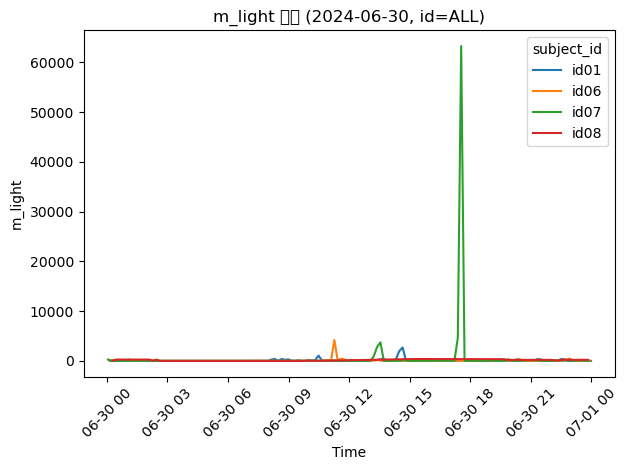

In [76]:
def plot_light_by_day(
    dataframe: pd.DataFrame,
    date_str: str,
    subject_id: str | None = None      # ← id를 추가로 선택
) -> None:
    
    """
    하루 단위 m_light 변화를 시각화 (id 선택 가능)

    Parameters
    ----------
    dataframe : pd.DataFrame
        'timestamp' (datetime), 'm_light', 'subject_id' 컬럼 필수
    date_str : str
        'YYYY-MM-DD' 형식
    subject_id : str | None
        특정 id만 보고 싶으면 id 지정, 여러 id를 동시에 보고 싶으면 None
    """

    # 1) 날짜 필터
    date_mask = dataframe["timestamp"].dt.date == pd.to_datetime(date_str).date()
    day_df = dataframe.loc[date_mask]

    # 2) id 필터
    if subject_id is not None:
        day_df = day_df[day_df["subject_id"] == subject_id]

    if day_df.empty:
        txt = f"{date_str}"
        txt += f", id={subject_id}" if subject_id else " (모든 id)"
        print(f"{txt} 데이터가 없습니다.")
        return

    # 3) 플롯
    plt.figure()

    # 여러 id를 동시에 보는 경우 ⇒ id별로 선 그래프
    if subject_id is None:
        for sid, grp in day_df.groupby("subject_id"):
            grp = grp.sort_values("timestamp")
            plt.plot(grp["timestamp"], grp["m_light"], label=sid)
        plt.legend(title="subject_id")
        caption_id = "ALL"
    else:
        day_df = day_df.sort_values("timestamp")
        plt.plot(day_df["timestamp"], day_df["m_light"])
        caption_id = subject_id

    plt.xlabel("Time")
    plt.ylabel("m_light")
    plt.title(f"m_light 변화 ({date_str}, id={caption_id})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_light_by_day(mLight, "2024-06-30", subject_id=None)